In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

In [2]:
transactions_df = pd.read_csv('Datasets\\Rents & Transactions\\transactions.csv', sep=';', on_bad_lines='skip')
rents_df = pd.read_csv('Datasets\\Rents & Transactions\\rents.csv', sep=';', on_bad_lines='skip')

C:\Users\Cody\AppData\Local\Temp\ipykernel_14364\1364774545.py:1: DtypeWarning: Columns (14,15,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions_df = pd.read_csv('Datasets\\Rents & Transactions\\transactions.csv', sep=';', on_bad_lines='skip')
C:\Users\Cody\AppData\Local\Temp\ipykernel_14364\1364774545.py:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  rents_df = pd.read_csv('Datasets\\Rents & Transactions\\rents.csv', sep=';', on_bad_lines='skip')


# Transactions

## Data Understanding

In [3]:
transactions_df.head()

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
0,13-7700-2022,02/06/2022 16:18,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.80,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.0,0.0,NaN,DAMAC HILLS (2) - ODORA
1,13-7699-2022,02/06/2022 16:14,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.80,NaN,NaN,NaN,NaN,Dubai Cycling Course,0.0,0.0,NaN,DAMAC HILLS (2) - ZINNIA
2,14-563-2022,02/06/2022 15:42,280311,Mortgage,Modify Mortgage,Ready,Non Free Hold,Residential,Al Barshaa South First,Land,...,1188.42,NaN,NaN,Sharaf Dg Metro Station,Mall of the Emirates,Motor City,0.0,0.0,NaN,NaN
3,11-12317-2022,02/06/2022 15:22,79102731,Sales,Sale,Ready,Free Hold,Commercial,AL FURJAN,Land,...,600.51,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,11-12316-2022,02/06/2022 15:07,132952797,Sales,Sale,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,112.24,NaN,NaN,NaN,NaN,Dubai Cycling Course,1.0,1.0,NaN,DAMAC HILLS (2) - AMARGO


In [4]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995975 entries, 0 to 995974
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Transaction Number       995975 non-null  object 
 1   Transaction Date         995975 non-null  object 
 2   Property ID              995975 non-null  int64  
 3   Transaction Type         995975 non-null  object 
 4   Transaction sub type     995975 non-null  object 
 5   Registration type        995975 non-null  object 
 6   Is Free Hold?            995975 non-null  object 
 7   Usage                    995975 non-null  object 
 8   Area                     995975 non-null  object 
 9   Property Type            995975 non-null  object 
 10  Property Sub Type        973723 non-null  object 
 11  Amount                   995975 non-null  float64
 12  Transaction Size (sq.m)  870248 non-null  float64
 13  Property Size (sq.m)     995972 non-null  float64
 14  Room

In [5]:
for column in transactions_df.columns:
    unique_values = transactions_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

Transaction Number            911106
Transaction Date              546434
Property ID                   507504
Transaction Type              3
Transaction sub type          49
Registration type             2
Is Free Hold?                 2
Usage                         2
Area                          372
Property Type                 3
Property Sub Type             47
Amount                        233885
Transaction Size (sq.m)       75360
Property Size (sq.m)          72833
Room(s)                       16
Parking                       77904
Nearest Metro                 58
Nearest Mall                  7
Nearest Landmark              16
No. of Buyer                  29
No. of Seller                 56
Master Project                4
Project                       1608


In [6]:
for column in transactions_df.columns:
    unique_values = transactions_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

Transaction Number            Transaction Number
43-4-2011         705
43-10-2012        545
49-5-2013         533
49-2-2015         472
43-56-2016        417
                 ... 
11-10120-2017       1
102-15757-2017      1
11-10119-2017       1
102-15756-2017      1
13-1744-1995        1
Name: count, Length: 911106, dtype: int64
Transaction Date              Transaction Date
26/09/2011 07:57    706
17/10/2012 10:29    547
04/02/2013 08:36    535
05/03/2015 11:52    473
19/10/2016 12:34    420
                   ... 
22/06/2017 10:19      1
22/06/2017 10:28      1
22/06/2017 10:35      1
22/06/2017 10:38      1
07/03/1995 00:00      1
Name: count, Length: 546434, dtype: int64
Property ID                   Property ID
53492061      52
53491842      45
53491755      45
837486        40
312957        26
              ..
98306580       1
1094193396     1
98307384       1
93414087       1
246591         1
Name: count, Length: 507504, dtype: int64
Transaction Type              Transaction T

In [7]:
transactions_df.duplicated().sum()

0

In [22]:
transactions_df.isnull().sum()

Transaction Number              0
Transaction Date                0
Property ID                     0
Transaction Type                0
Transaction sub type            0
Registration type               0
Is Free Hold?                   0
Usage                           0
Area                            0
Property Type                   0
Property Sub Type           22252
Amount                          0
Transaction Size (sq.m)    125727
Property Size (sq.m)            0
Room(s)                    237814
Parking                    493339
Nearest Metro              216134
Nearest Mall               220059
Nearest Landmark           103367
No. of Buyer                  188
No. of Seller                 188
Project                    407284
dtype: int64

## Data Cleaning

In [9]:
transactions_df.drop(columns=['Master Project'], inplace = True)

In [21]:
transactions_df.dropna(subset=['Property Size (sq.m)'], inplace=True)

In [23]:
transactions_df.to_csv('Cleaned Datasets\\Rents & Transactions\\transactions.csv', index=False)

## Data Visualization

# Rents

## Data Understanding

In [11]:
rents_df.head()

,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,...,Property Sub Type,Number of Rooms,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,Parking,No of Units,Master Project,Project
0,120210425000238,25/04/2021 09:36:31,13/04/2021 00:00:00,12/04/2026 00:00:00,1058329686,New,Dubai Investment Park Second,25000,5000,Free Hold,...,Factory,NaN,Industrial,NaN,NaN,Expo 2020 Site,NaN,1,NaN,NaN
1,120210526001582,26/05/2021 12:12:22,01/06/2021 00:00:00,30/11/2025 00:00:00,99539298,New,Um Nahad Third,16000000,4000000,Free Hold,...,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN,NaN
2,120210526001913,26/05/2021 12:47:49,15/06/2021 00:00:00,14/12/2025 00:00:00,99539289,New,Um Nahad Third,16000000,4000000,Free Hold,...,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN,NaN
3,120210526002150,26/05/2021 13:14:55,01/07/2021 00:00:00,31/12/2025 00:00:00,99539307,New,Um Nahad Third,16000000,4000000,Free Hold,...,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN,NaN
4,120210526002235,26/05/2021 13:27:36,15/07/2021 00:00:00,14/01/2026 00:00:00,99539316,New,Um Nahad Third,16000000,4000000,Free Hold,...,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN,NaN


In [12]:
rents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475131 entries, 0 to 5475130
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Ejari Contract Number  int64  
 1   Registration Date      object 
 2   Start Date             object 
 3   End Date               object 
 4   Property ID            int64  
 5   Version                object 
 6   Area                   object 
 7   Contract Amount        object 
 8   Annual Amount          object 
 9   Is Free Hold?          object 
 10  Property Size (sq.m)   object 
 11  Property Type          object 
 12  Property Sub Type      object 
 13  Number of Rooms        float64
 14  Usage                  object 
 15  Nearest Metro          object 
 16  Nearest Mall           object 
 17  Nearest Landmark       object 
 18  Parking                float64
 19  No of Units            int64  
 20  Master Project         object 
 21  Project                object 
dtypes: float64(2), int

In [13]:
for column in rents_df.columns:
    unique_values = rents_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

Ejari Contract Number         2454744
Registration Date             4554167
Start Date                    6621
End Date                      8544
Property ID                   1088523
Version                       2
Area                          216
Contract Amount               193993
Annual Amount                 240600
Is Free Hold?                 2
Property Size (sq.m)          45462
Property Type                 5
Property Sub Type             71
Number of Rooms               13
Usage                         10
Nearest Metro                 56
Nearest Mall                  5
Nearest Landmark              14
Parking                       93
No of Units                   287
Master Project                2
Project                       1100


In [14]:
for column in rents_df.columns:
    unique_values = rents_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

Ejari Contract Number         Ejari Contract Number
120150524000949    1488
120150902000019    1371
120130924000874    1240
120130626006528    1232
67389212           1221
                   ... 
120191017001251       1
220191102001214       1
220191028002065       1
220191031003305       1
120210425000238       1
Name: count, Length: 2454744, dtype: int64
Registration Date             Registration Date
17/03/2021 13:18:58    636
21/01/2018 16:30:16    564
04/12/2017 10:17:07    564
20/07/2017 13:23:57    535
02/11/2017 12:21:15    528
                      ... 
24/05/2018 13:52:07      1
11/02/2018 16:37:17      1
31/01/2018 12:47:46      1
17/05/2018 10:57:09      1
29/03/2015 12:27:13      1
Name: count, Length: 4554167, dtype: int64
Start Date                    Start Date
01/01/2018 00:00:00    53191
01/01/2019 00:00:00    51814
01/01/2017 00:00:00    51785
01/01/2015 00:00:00    51321
01/01/2016 00:00:00    49806
                       ...  
07/06/2008 00:00:00        1
04/09/200

In [15]:
rents_df.duplicated().sum()

3199

In [16]:
rents_df.isnull().sum()

Ejari Contract Number          0
Registration Date              0
Start Date                     0
End Date                       0
Property ID                    0
Version                        0
Area                         325
Contract Amount                0
Annual Amount                 68
Is Free Hold?                  0
Property Size (sq.m)       12491
Property Type                  0
Property Sub Type          40049
Number of Rooms          5285076
Usage                      55172
Nearest Metro             562087
Nearest Mall              598919
Nearest Landmark          346755
Parking                  5306965
No of Units                    0
Master Project           5474875
Project                  4680516
dtype: int64

array([[<Axes: title={'center': 'Ejari Contract Number'}>,
        <Axes: title={'center': 'Property ID'}>],
       [<Axes: title={'center': 'Number of Rooms'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'No of Units'}>, <Axes: >]], dtype=object)

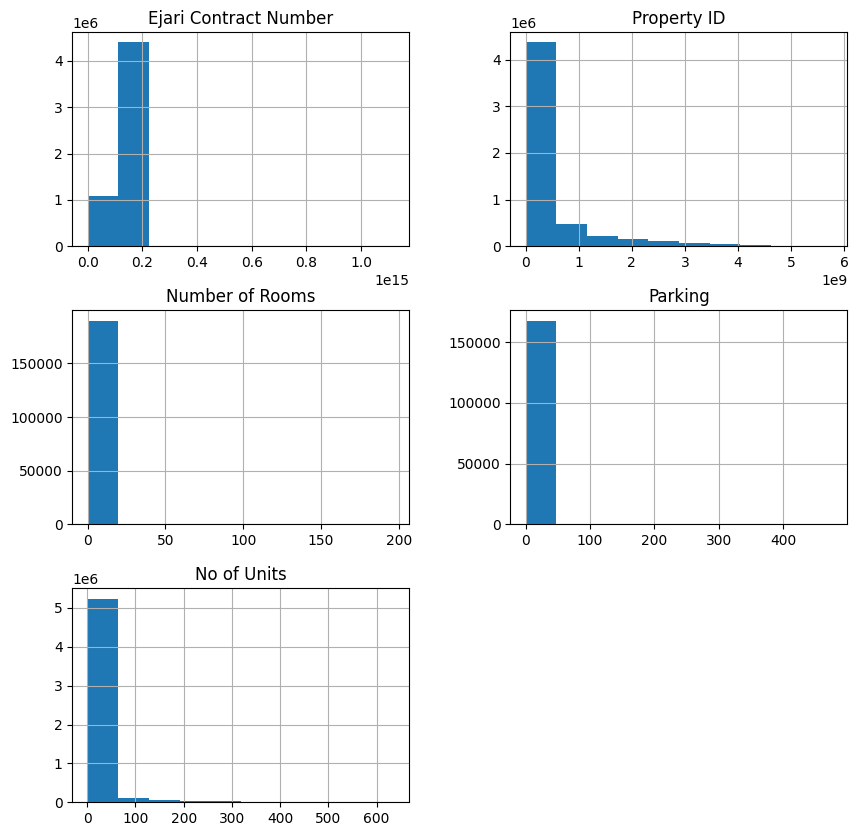

In [17]:
rents_df.hist(figsize=(10, 10))

## Data Cleaning

In [18]:
rents_df.drop(columns=['Project', 'Master Project', 'Parking', 'Number of Rooms' ], inplace = True)


In [19]:
rents_df.to_csv('Cleaned Datasets\\Rents & Transactions\\rents.csv', index=False)

## Data Visualization